In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [2]:
np.random.seed(42)

In [3]:
import pandas as pd
df = pd.read_csv("scatter-points.csv")
points = df.to_numpy()

In [4]:
blue_points = points[points[:,0] < 0.4]
blue_points = blue_points[blue_points[:,1] > 0.6]
blue_points

array([[ 1.43922558e-02,  6.20535117e-01],
       [ 4.90688096e-02,  7.32256330e-01],
       [-4.45382762e-04,  7.83587757e-01],
       [ 7.76752547e-02,  9.16243939e-01],
       [ 5.80344384e-02,  1.05952167e+00],
       [ 1.63829004e-01,  6.07564921e-01],
       [ 1.09105153e-01,  7.33172229e-01],
       [ 1.36793376e-01,  7.93097221e-01],
       [ 1.79665223e-01,  9.44787091e-01],
       [ 1.12911634e-01,  1.00272322e+00],
       [ 2.26428058e-01,  7.06803101e-01],
       [ 2.32980825e-01,  8.45286617e-01],
       [ 2.43314650e-01,  9.34099742e-01],
       [ 2.94359486e-01,  1.00382860e+00],
       [ 3.52370219e-01,  7.37352359e-01],
       [ 3.44153908e-01,  7.76336596e-01],
       [ 3.56722150e-01,  9.55610465e-01],
       [ 3.92371480e-01,  1.04864216e+00]])

(-0.05, 1.15)

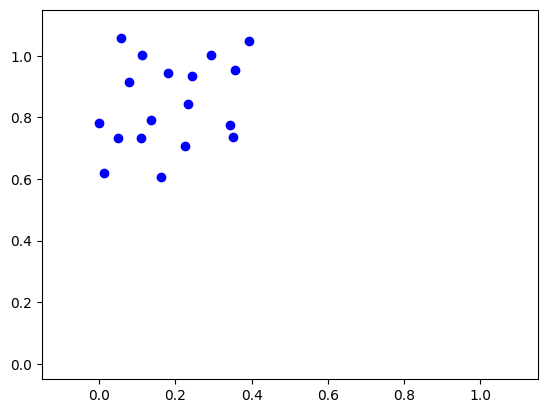

In [5]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

In [6]:
mask = ~np.isin(points, blue_points).all(axis=1)
red_points = points[mask]
red_points

array([[ 0.04531427,  0.06796733],
       [ 0.06473172,  0.13577409],
       [ 0.00769037,  0.27796893],
       [ 0.03913065,  0.38939614],
       [ 0.0430464 ,  0.4502481 ],
       [ 0.12159864,  0.01036217],
       [ 0.19107559,  0.11410066],
       [ 0.15812699,  0.25332874],
       [ 0.17941997,  0.39894367],
       [ 0.16713303,  0.50791574],
       [ 0.23097108, -0.00352038],
       [ 0.22853833,  0.17433221],
       [ 0.27433542,  0.21984868],
       [ 0.28456946,  0.37403235],
       [ 0.24259039,  0.44859529],
       [ 0.29524062,  0.56965505],
       [ 0.40919619, -0.0014033 ],
       [ 0.37718229,  0.18521288],
       [ 0.34790792,  0.21981189],
       [ 0.37376182,  0.40862986],
       [ 0.38837815,  0.5157359 ],
       [ 0.33170812,  0.5919116 ],
       [ 0.50838969,  0.0142784 ],
       [ 0.52381411,  0.161414  ],
       [ 0.51552159,  0.26575455],
       [ 0.44176378,  0.41141589],
       [ 0.47269994,  0.47700368],
       [ 0.47659295,  0.56198696],
       [ 0.50193796,

(-0.05, 1.15)

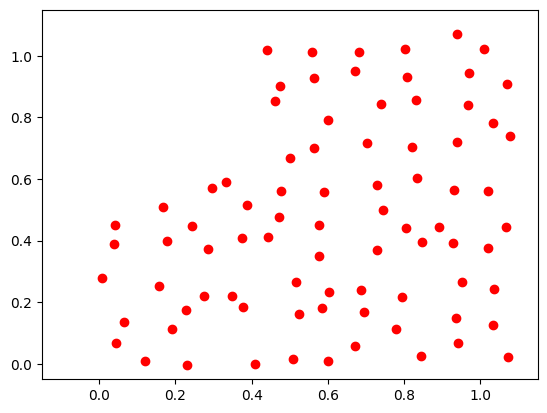

In [7]:
plt.scatter(red_points[:,0], red_points[:,1], color='red')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

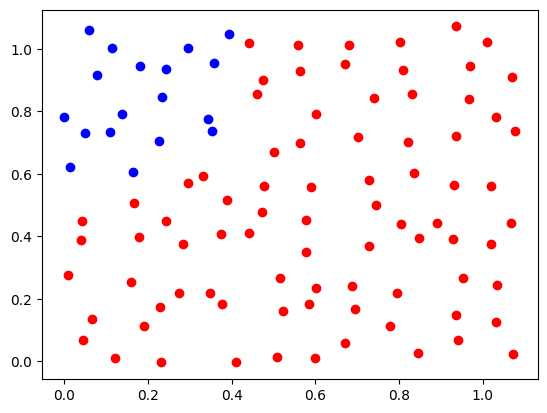

In [8]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.scatter(red_points[:,0], red_points[:,1], color='red')

In [82]:
# Combine points and create binary labels
X = np.concatenate((red_points, blue_points), axis=0)
# Red = 0, Blue = 1 (Binary Classification)
Y_red = np.zeros((len(red_points), 1))
Y_blue = np.ones((len(blue_points), 1))
Y = np.concatenate((Y_red, Y_blue), axis=0)

In [83]:
# Shuffle data for better SGD training
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]a
Y_shuffled = Y[indices].flatten() # Flatten Y to be a vector of scalars for single output

In [84]:
# --- 2. Test-Train Split ---
# Total number of samples: 106
total_samples = len(X_shuffled)
# Use 80% for training
train_size = int(0.8 * total_samples) 

# Split the data
X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
Y_train, Y_test = Y_shuffled[:train_size], Y_shuffled[train_size:]

print(f"Total Samples: {total_samples}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

Total Samples: 100
Training Samples: 80
Testing Samples: 20


In [85]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-z))

def d_sigmoid(a):
    """Derivative of the sigmoid function, where a = sigmoid(z)."""
    return a * (1.0 - a)

def tanh(z):
    """Hyperbolic tangent activation function."""
    return np.tanh(z)

def d_tanh(a):
    """Derivative of the tanh function, where a = tanh(z)."""
    return 1.0 - a**2

In [92]:
class NeuralNetwork:
    def __init__(self, layer_dims):
        self.layer_dims = layer_dims
        self.num_layers = len(layer_dims) - 1
        self.weights = [
            np.random.randn(layer_dims[i], layer_dims[i+1]) * np.sqrt(2.0/layer_dims[i])
            for i in range(self.num_layers)
        ]
        self.biases = [np.zeros(layer_dims[i+1]) for i in range(self.num_layers)]

    def forward(self, x):
        a = x
        self.zs = []
        self.activations = [a]
        for i in range(self.num_layers):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            self.zs.append(z)
            if i == self.num_layers - 1:
                a = sigmoid(z)
            else:
                a = tanh(z)
            self.activations.append(a)
        return a

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
        return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

    def backward(self, x, y_true, learning_rate=0.01):
        y_pred = self.activations[-1]
        delta = y_pred - y_true
        grads_w = [None] * self.num_layers
        grads_b = [None] * self.num_layers

        for l in reversed(range(self.num_layers)):
            grads_w[l] = np.outer(self.activations[l], delta)
            grads_b[l] = delta
            if l > 0:
                delta = np.dot(self.weights[l], delta) * d_tanh(self.activations[l])
        for l in range(self.num_layers):
            self.weights[l] -= learning_rate * grads_w[l]
            self.biases[l] -= learning_rate * grads_b[l]
        return y_pred

    def fit(self, X, Y, epochs=500, learning_rate=0.01, print_interval=50):
        for epoch in range(epochs):
            total_loss = 0
            for x, y_true in zip(X, Y):
                self.forward(x)
                self.backward(x, y_true, learning_rate)
                loss = self.compute_loss(y_true, self.activations[-1])
                total_loss += loss
            avg_loss = total_loss / len(X)
            if (epoch % print_interval == 0) or (epoch == epochs-1):
                print(f"Epoch {epoch+1}/{epochs} Loss: {avg_loss:.4f}")
            yield self.weights, self.biases  # Always yield every epoch

In [93]:
layer_dims = [2, 3, 3, 1]
nn = NeuralNetwork(layer_dims)

In [94]:
nn.layer_dims

[2, 3, 3, 1]

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(blue_points[:,0], blue_points[:,1], color='blue', label='Class 1')
ax.scatter(red_points[:,0], red_points[:,1], color='red', label='Class 0')
ax.set_xlim(-0.1, 1.15)
ax.set_ylim(-0.1, 1.15)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

lines = [ax.plot([], [], label=f'Neuron {i+1}')[0] for i in range(layer_dims[1])]
x_vals = np.linspace(-0.1, 1.15, 200)
ax.legend()

def update(params):
    # Print to debug animation steps
    print("Updating frame")
    weights, biases = params
    w = weights[0]   # First layer weights shape (2,3)
    b = biases[0]    # First layer biases shape (3,)
    for i, line in enumerate(lines):
        w1, w2 = w[:, i]
        bias = b[i]
        if abs(w2) < 1e-8:
            y_plot = np.full_like(x_vals, -bias)
        else:
            m = -w1 / w2
            c = -bias / w2
            y_plot = m * x_vals + c
        line.set_data(x_vals, y_plot)
    return lines

ani = animation.FuncAnimation(
    fig, update,
    frames=nn.fit(X_shuffled, Y_shuffled, epochs=500, learning_rate=0.01),
    interval=40, blit=True, repeat=False, cache_frame_data=False
)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\umash\miniconda3\envs\practice_space\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\umash\AppData\Local\Temp\ipykernel_2432\2505193256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
